In [9]:
import pandas as pd

file_path = 'WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.csv'
df = pd.read_csv(file_path, skiprows=31)

columns = df[['Year', 'Region, subregion, country or area *', 'Median Age, as of 1 July (years)']]
columns.rename(columns={'Region, subregion, country or area *': 'Country/Area','Median Age, as of 1 July (years)': 'Median Age'}, inplace=True)
columns['Year'] = columns['Year'].astype(int, errors='ignore')
columns = columns[pd.to_numeric(columns['Year'], errors='coerce').notnull()]
columns['Year'] = columns['Year'].astype(int)

print("Columns for Presentation")
print(columns.head())

Columns for Presentation
   Year Country/Area Median Age
0  1950        WORLD       22.2
1  1951        WORLD       22.2
2  1952        WORLD       22.1
3  1953        WORLD       22.0
4  1954        WORLD       22.0


/var/folders/w2/l0szqyz11jx0jptdmx2ryx7c0000gn/T/ipykernel_74827/1021903010.py:4: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, skiprows=31)
/var/folders/w2/l0szqyz11jx0jptdmx2ryx7c0000gn/T/ipykernel_74827/1021903010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns.rename(columns={'Region, subregion, country or area *': 'Country/Area','Median Age, as of 1 July (years)': 'Median Age'}, inplace=True)
/var/folders/w2/l0szqyz11jx0jptdmx2ryx7c0000gn/T/ipykernel_74827/1021903010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [10]:
import matplotlib.pyplot as plt

columns['Median Age'] = pd.to_numeric(columns['Median Age'], errors='coerce')
country_data = columns[columns['Country/Area'] == 'WORLD']

print("\nGlobal Median Age Statistics:")
print(country_data['Median Age'].describe())


Global Median Age Statistics:
count    72.000000
mean     23.615278
std       2.912850
min      20.300000
25%      21.400000
50%      22.200000
75%      25.950000
max      30.000000
Name: Median Age, dtype: float64


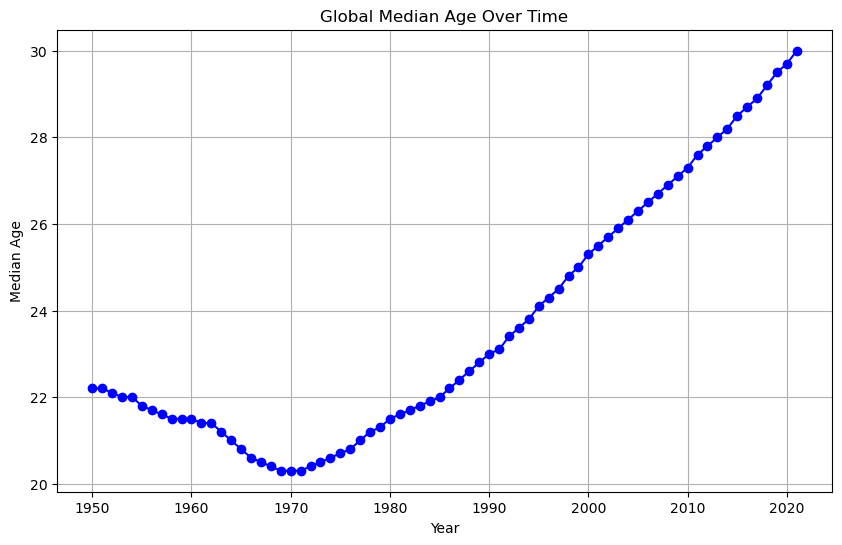

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['Median Age'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Global Median Age Over Time')
plt.grid(True)
plt.show()

/var/folders/w2/l0szqyz11jx0jptdmx2ryx7c0000gn/T/ipykernel_74827/2266346331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2020['Median Age'] = pd.to_numeric(year2020['Median Age'], errors='coerce')


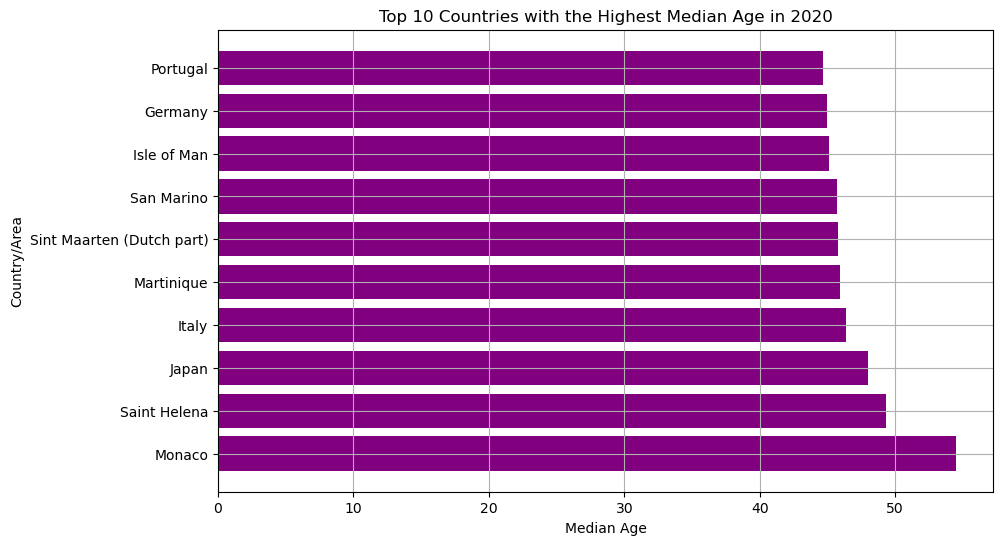

In [12]:
year2020 = columns[columns['Year'] == 2020]
year2020['Median Age'] = pd.to_numeric(year2020['Median Age'], errors='coerce')
highest_age = year2020.sort_values(by='Median Age', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(highest_age['Country/Area'], highest_age['Median Age'], color='purple')
plt.xlabel('Median Age')
plt.ylabel('Country/Area')
plt.title('Top 10 Countries with the Highest Median Age in 2020')
plt.grid(True)
plt.show()

/var/folders/w2/l0szqyz11jx0jptdmx2ryx7c0000gn/T/ipykernel_74827/2372891361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2020['Median Age'] = pd.to_numeric(year2020['Median Age'], errors='coerce')


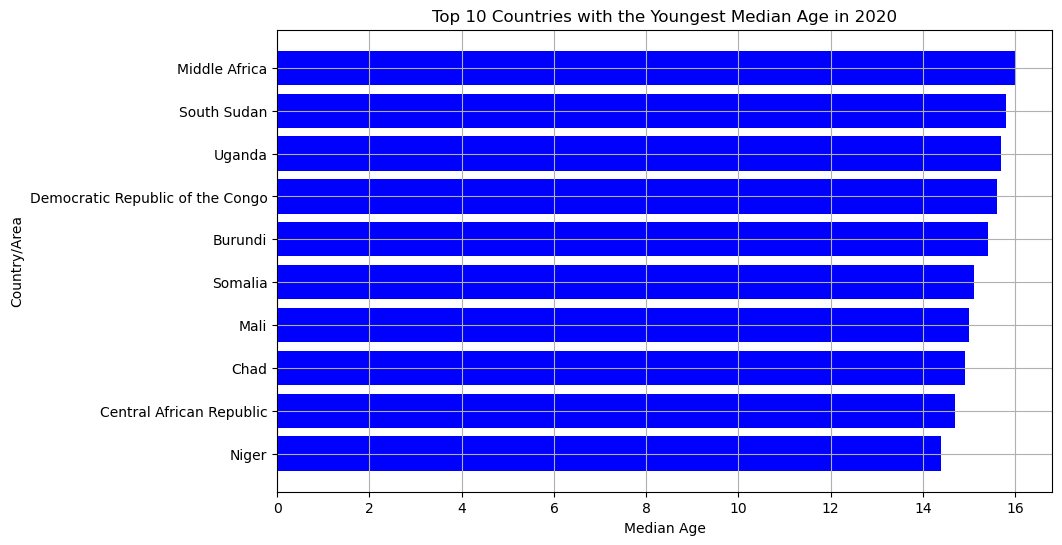

In [13]:
year2020 = columns[columns['Year'] == 2020]
year2020['Median Age'] = pd.to_numeric(year2020['Median Age'], errors='coerce')
youngest_age = year2020.sort_values(by='Median Age', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.barh(youngest_age['Country/Area'], youngest_age['Median Age'], color='blue')
plt.xlabel('Median Age')
plt.ylabel('Country/Area')
plt.title('Top 10 Countries with the Youngest Median Age in 2020')
plt.grid(True)
plt.show()


Statistics for Monaco's Median Age:
count    72.000000
mean     45.373611
std       3.406290
min      42.400000
25%      43.400000
50%      44.050000
75%      45.150000
max      54.500000
Name: Median Age, dtype: float64


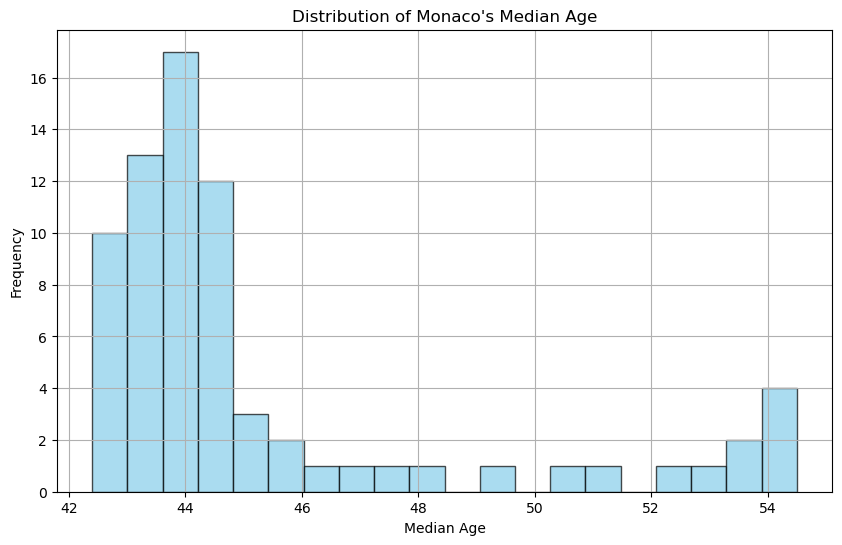

In [14]:
monaco = columns[columns['Country/Area'] == 'Monaco']
print("\nStatistics for Monaco's Median Age:")
print(monaco['Median Age'].describe())

plt.figure(figsize=(10, 6))
plt.hist(monaco['Median Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.title("Distribution of Monaco's Median Age")
plt.grid(True)
plt.show()

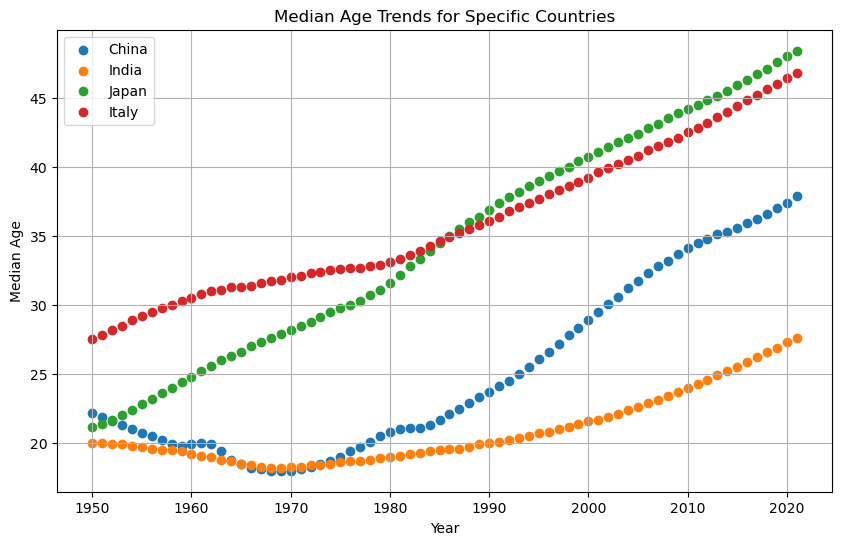

In [15]:
specific_countries = ['China', 'India', 'Japan', 'Italy']
x = columns[columns['Country/Area'].isin(specific_countries)]

plt.figure(figsize=(10, 6))
for country in specific_countries:
    countryinfo = x[x['Country/Area'] == country]
    plt.scatter(countryinfo['Year'], countryinfo['Median Age'], label=country)

    plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median Age Trends for Specific Countries')
plt.legend()
plt.grid(True)
plt.show()


Statistics for Median Age (Recent Years):
count    3420.000000
mean       29.216930
std         8.887141
min        14.000000
25%        21.400000
50%        28.600000
75%        37.300000
max        54.500000
Name: Median Age, dtype: float64

Country with the Youngest Population: Uganda
Country with the Oldest Population: Monaco


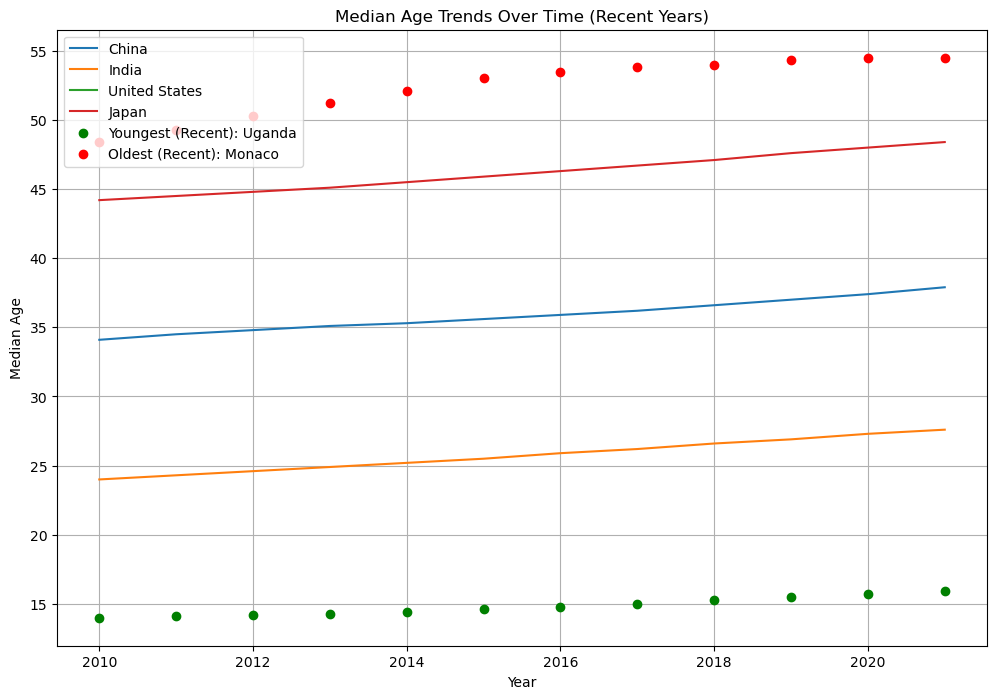

In [17]:
specific_years = columns[columns['Year'] >= 2010]
print("\nStatistics for Median Age (Recent Years):")
print(specific_years['Median Age'].describe())

youngest_age_country = specific_years.loc[specific_years['Median Age'].idxmin(), 'Country/Area']
oldest_age_country = specific_years.loc[specific_years['Median Age'].idxmax(), 'Country/Area']
print("\nCountry with the Youngest Population:", youngest_age_country)
print("Country with the Oldest Population:", oldest_age_country)

plt.figure(figsize=(12, 8))
different_countries = ['China', 'India', 'United States', 'Japan']
for country in different_countries:
    country_data = specific_years[specific_years['Country/Area'] == country]
    plt.plot(country_data['Year'], country_data['Median Age'], label=country)

plt.scatter(specific_years[specific_years['Country/Area'] == youngest_age_country]['Year'],
            specific_years[specific_years['Country/Area'] == youngest_age_country]['Median Age'],
            color='green', label=f"Youngest (Recent): {youngest_age_country}", zorder=5)
plt.scatter(specific_years[specific_years['Country/Area'] == oldest_age_country]['Year'],
            specific_years[specific_years['Country/Area'] == oldest_age_country]['Median Age'],
            color='red', label=f"Oldest (Recent): {oldest_age_country}", zorder=5)
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.title('Median Age Trends Over Time (Recent Years)')
plt.legend()
plt.grid(True)
plt.show()